In [1]:
!pip3 install imbalanced-learn

     |████████████████████████████████| 204kB 22.3MB/s eta 0:00:01
     |████████████████████████████████| 24.8MB 71.6MB/s eta 0:00:01
ERROR: mosaic-connector-python 1.0.0 has requirement nltk==3.3, but you'll have nltk 3.5 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement numpy==1.16.1, but you'll have numpy 1.21.4 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement pandas==1.0.4, but you'll have pandas 1.1.4 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement scikit-learn==0.24.2, but you'll have scikit-learn 1.0.2 which is incompatible.
ERROR: kyd 0.1.10 has requirement bokeh==2.3.3, but you'll have bokeh 2.1.1 which is incompatible.
ERROR: kyd 0.1.10 has requirement matplotlib==3.3.4, but you'll have matplotlib 3.1.1 which is incompatible.
ERROR: kyd 0.1.10 has requirement nltk==3.6.2, but you'll have nltk 3.5 which is incompatible.
ERROR: kyd 0.1.10 has requirement numpy==1.19.2, but you'll have numpy 1.21.4

In [75]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/lib/python3.7/site-packages (1.0.2)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [76]:
import sklearn
sklearn.__version__

'1.0.2'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
from connector.mosaicio import MosaicioConnector
ioConnector = MosaicioConnector()

In [3]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [87]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
df = pd.read_csv('telecom_churn_preprocess_data.csv')

In [9]:
df.head()

,Unnamed: 0,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,streamingmovies,paperlessbilling,monthlycharges,totalcharges,churn,contract_One year,contract_Two year,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,0,1,0,1,0,1,0,0,...,0,1,29.85,29,0,0,0,0,1,0
1,1,1,0,0,0,34,1,0,0,2,...,0,0,56.95,1889,0,1,0,0,0,1
2,2,1,0,0,0,2,1,0,0,2,...,0,1,53.85,108,1,0,0,0,0,1
3,3,1,0,0,0,45,0,1,0,2,...,0,0,42.30,1840,0,1,0,0,0,0
4,4,0,0,0,0,2,1,0,1,0,...,0,1,70.70,151,1,0,0,0,1,0


In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
x = df.drop("churn", axis = 1)
y = df['churn']

In [12]:
#We are deleting totalcharges due to high correlation with tenure column.
x.drop('totalcharges', axis=1, inplace=True)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.2)
print(y_train.value_counts())

0    4131
1    1485
Name: churn, dtype: int64


In [14]:
scale = MinMaxScaler()
col = x_train.columns

x_train[col] = scale.fit_transform(x_train[col])
x_test[col] = scale.transform(x_test[col])

In [15]:
#Fit basic model on imbalanced dataset
DT = DecisionTreeClassifier(random_state=0)
cross_val_DT = cross_val_score(DT, x_train, y_train , scoring = 'accuracy' ) 
cross_val_DT_f1 = cross_val_score(DT, x_train, y_train , scoring = 'f1') 

RF = RandomForestClassifier(random_state=0)
cross_val_RF = cross_val_score(RF, x_train, y_train , scoring = 'accuracy' ) 
cross_val_RF_f1 = cross_val_score(RF, x_train, y_train , scoring = 'f1') 

ET = ExtraTreesClassifier(random_state=0)
cross_val_ET = cross_val_score(ET, x_train, y_train , scoring = 'accuracy' ) 
cross_val_ET_f1 = cross_val_score(ET, x_train, y_train , scoring = 'f1') 

MLP = MLPClassifier(random_state=0)
cross_val_MLP = cross_val_score(MLP, x_train, y_train , scoring = 'accuracy' ) 
cross_val_MLP_f1 = cross_val_score(MLP, x_train, y_train , scoring = 'f1') 

GB = GradientBoostingClassifier(random_state=0)
cross_val_GB = cross_val_score(GB, x_train, y_train , scoring = 'accuracy' ) 
cross_val_GB_f1 = cross_val_score(GB, x_train, y_train , scoring = 'f1') 

LR = LogisticRegression(random_state=0)
cross_val_LR = cross_val_score(LR, x_train, y_train , scoring = 'accuracy' ) 
cross_val_LR_f1 = cross_val_score(LR, x_train, y_train , scoring = 'f1') 

KNN = KNeighborsClassifier()
cross_val_KNN = cross_val_score(KNN, x_train, y_train , scoring = 'accuracy' ) 
cross_val_KNN_f1 = cross_val_score(KNN, x_train, y_train , scoring = 'f1') 

In [16]:
compare_models = [('Decision Tree', cross_val_DT.mean(),cross_val_DT_f1.mean()),
                  ('Random Forest', cross_val_RF.mean(),cross_val_RF_f1.mean()),
                  ('Neural Network', cross_val_MLP.mean(),cross_val_MLP_f1.mean()),
                  ('Extra Tree', cross_val_ET.mean(),cross_val_ET_f1.mean()),
                  ('GradientBoosting', cross_val_GB.mean(),cross_val_GB_f1.mean()),
                  ('Logistic Regression', cross_val_LR.mean(),cross_val_LR_f1.mean()),
                  ('KNN', cross_val_KNN.mean(), cross_val_KNN_f1.mean())]

In [17]:
predict = pd.DataFrame(data = compare_models, 
                       columns=['Model','Cross_validation_mean(accuracy)', 'Cross_validation_mean(f1_score)'])
predict.style.background_gradient(cmap='YlGn')

,Model,Cross_validation_mean(accuracy),Cross_validation_mean(f1_score)
0,Decision Tree,0.717949,0.477875
1,Random Forest,0.780092,0.518339
2,Neural Network,0.781694,0.554622
3,Extra Tree,0.761575,0.496172
4,GradientBoosting,0.795048,0.557716
5,Logistic Regression,0.797540,0.575564
6,KNN,0.758548,0.528010


In [18]:
#Random OverSample
x_train_Sample = x_train.copy()
y_train_Sample = y_train.copy()

randOverSample = RandomOverSampler(random_state=100,)
x_train_OverSample, y_train_OverSample = randOverSample.fit_resample(x_train_Sample, y_train_Sample.ravel())

In [19]:
#Fit basic model on OverSample dataset
DT = DecisionTreeClassifier(random_state=0)
cross_val_DT = cross_val_score(DT, x_train_OverSample, y_train_OverSample , scoring = 'accuracy' ) 
cross_val_DT_f1 = cross_val_score(DT, x_train_OverSample, y_train_OverSample , scoring = 'f1') 

RF = RandomForestClassifier(random_state=0)
cross_val_RF = cross_val_score(RF, x_train_OverSample, y_train_OverSample , scoring = 'accuracy' ) 
cross_val_RF_f1 = cross_val_score(RF, x_train_OverSample, y_train_OverSample , scoring = 'f1') 

ET = ExtraTreesClassifier(random_state=0)
cross_val_ET = cross_val_score(ET, x_train_OverSample, y_train_OverSample , scoring = 'accuracy' ) 
cross_val_ET_f1 = cross_val_score(ET, x_train_OverSample, y_train_OverSample , scoring = 'f1') 

MLP = MLPClassifier(random_state=0)
cross_val_MLP = cross_val_score(MLP, x_train_OverSample, y_train_OverSample , scoring = 'accuracy' ) 
cross_val_MLP_f1 = cross_val_score(MLP, x_train_OverSample, y_train_OverSample , scoring = 'f1') 

GB = GradientBoostingClassifier(random_state=0)
cross_val_GB = cross_val_score(GB, x_train_OverSample, y_train_OverSample , scoring = 'accuracy' ) 
cross_val_GB_f1 = cross_val_score(GB, x_train_OverSample, y_train_OverSample , scoring = 'f1') 

LR = LogisticRegression(random_state=0)
cross_val_LR = cross_val_score(LR, x_train_OverSample, y_train_OverSample , scoring = 'accuracy' ) 
cross_val_LR_f1 = cross_val_score(LR, x_train_OverSample, y_train_OverSample , scoring = 'f1') 

KNN = KNeighborsClassifier()
cross_val_KNN = cross_val_score(KNN, x_train_OverSample, y_train_OverSample , scoring = 'accuracy' ) 
cross_val_KNN_f1 = cross_val_score(KNN, x_train_OverSample, y_train_OverSample , scoring = 'f1') 

In [20]:
compare_models = [('Decision Tree', cross_val_DT.mean(),cross_val_DT_f1.mean()),
                  ('Random Forest', cross_val_RF.mean(),cross_val_RF_f1.mean()),
                  ('Neural Network', cross_val_MLP.mean(),cross_val_MLP_f1.mean()),
                  ('Extra Tree', cross_val_ET.mean(),cross_val_ET_f1.mean()),
                  ('GradientBoosting', cross_val_GB.mean(),cross_val_GB_f1.mean()),
                  ('Logistic Regression', cross_val_LR.mean(),cross_val_LR_f1.mean()),
                  ('KNN', cross_val_KNN.mean(), cross_val_KNN_f1.mean())]

In [21]:
predict = pd.DataFrame(data = compare_models, 
                       columns=['Model','Cross_validation_mean(accuracy)', 'Cross_validation_mean(f1_score)'])
predict.style.background_gradient(cmap='YlGn')

,Model,Cross_validation_mean(accuracy),Cross_validation_mean(f1_score)
0,Decision Tree,0.874976,0.884273
1,Random Forest,0.899787,0.906104
2,Neural Network,0.786253,0.799460
3,Extra Tree,0.909592,0.913699
4,GradientBoosting,0.782135,0.790910
5,Logistic Regression,0.757321,0.765098
6,KNN,0.761319,0.783885


In [22]:
#SMOTE
x_train_sample = x_train.copy()
y_train_sample = y_train.copy()

sm = SMOTE(random_state=100)
x_train_smote, y_train_smote = sm.fit_resample(x_train_sample, y_train_sample.ravel())

In [23]:
#Fit basic model on OverSample dataset
DT = DecisionTreeClassifier(random_state=0)
cross_val_DT = cross_val_score(DT, x_train_smote, y_train_smote , scoring = 'accuracy' ) 
cross_val_DT_f1 = cross_val_score(DT, x_train_smote, y_train_smote , scoring = 'f1') 

RF = RandomForestClassifier(random_state=0)
cross_val_RF = cross_val_score(RF, x_train_smote, y_train_smote , scoring = 'accuracy' ) 
cross_val_RF_f1 = cross_val_score(RF, x_train_smote, y_train_smote , scoring = 'f1') 

ET = ExtraTreesClassifier(random_state=0)
cross_val_ET = cross_val_score(ET, x_train_smote, y_train_smote , scoring = 'accuracy' ) 
cross_val_ET_f1 = cross_val_score(ET, x_train_smote, y_train_smote , scoring = 'f1') 

MLP = MLPClassifier(random_state=0)
cross_val_MLP = cross_val_score(MLP, x_train_smote, y_train_smote , scoring = 'accuracy' ) 
cross_val_MLP_f1 = cross_val_score(MLP, x_train_smote, y_train_smote , scoring = 'f1') 

GB = GradientBoostingClassifier(random_state=0)
cross_val_GB = cross_val_score(GB, x_train_smote, y_train_smote , scoring = 'accuracy' ) 
cross_val_GB_f1 = cross_val_score(GB, x_train_smote, y_train_smote , scoring = 'f1') 

LR = LogisticRegression(random_state=0)
cross_val_LR = cross_val_score(LR, x_train_smote, y_train_smote , scoring = 'accuracy' ) 
cross_val_LR_f1 = cross_val_score(LR, x_train_smote, y_train_smote , scoring = 'f1') 

KNN = KNeighborsClassifier()
cross_val_KNN = cross_val_score(KNN, x_train_smote, y_train_smote , scoring = 'accuracy' ) 
cross_val_KNN_f1 = cross_val_score(KNN, x_train_smote, y_train_smote , scoring = 'f1') 

In [24]:
compare_models = [('Decision Tree', cross_val_DT.mean(),cross_val_DT_f1.mean()),
                  ('Random Forest', cross_val_RF.mean(),cross_val_RF_f1.mean()),
                  ('Neural Network', cross_val_MLP.mean(),cross_val_MLP_f1.mean()),
                  ('Extra Tree', cross_val_ET.mean(),cross_val_ET_f1.mean()),
                  ('GradientBoosting', cross_val_GB.mean(),cross_val_GB_f1.mean()),
                  ('Logistic Regression', cross_val_LR.mean(),cross_val_LR_f1.mean()),
                  ('KNN', cross_val_KNN.mean(), cross_val_KNN_f1.mean())]

In [25]:
predict = pd.DataFrame(data = compare_models, 
                       columns=['Model','Cross_validation_mean(accuracy)', 'Cross_validation_mean(f1_score)'])
predict.style.background_gradient(cmap='YlGn')

,Model,Cross_validation_mean(accuracy),Cross_validation_mean(f1_score)
0,Decision Tree,0.775131,0.769884
1,Random Forest,0.853565,0.848848
2,Neural Network,0.806109,0.814325
3,Extra Tree,0.866754,0.865387
4,GradientBoosting,0.831775,0.831114
5,Logistic Regression,0.772938,0.779370
6,KNN,0.792187,0.813715


In [26]:
#let's try out Random OverSampling technique on a RandomForest model.
RF = RandomForestClassifier(random_state=0)
RF.fit(x_train_OverSample,y_train_OverSample)
y_pred = RF.predict(x_test)
print ("Accuracy score: ",accuracy_score(y_pred,y_test))
print ("------------------------------")
print ("F1_score: ",f1_score(y_pred,y_test))

Accuracy score:  0.7935943060498221
------------------------------
F1_score:  0.5994475138121548


In [27]:
#let's try out Random OverSampling technique on a Extra tree classifier.
ET = ExtraTreesClassifier(random_state=0)
ET.fit(x_train_OverSample,y_train_OverSample)
y_pred = ET.predict(x_test)
print ("Accuracy score: ",accuracy_score(y_pred,y_test))
print ("------------------------------")
print ("F1_score: ",f1_score(y_pred,y_test))

Accuracy score:  0.7786476868327402
------------------------------
F1_score:  0.5266362252663622


In [28]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [29]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_OverSample, y_train_OverSample)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [30]:
rf_random.best_params_
'''
{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}
''' 

"\n{'bootstrap': True,\n 'max_depth': 70,\n 'max_features': 'auto',\n 'min_samples_leaf': 4,\n 'min_samples_split': 10,\n 'n_estimators': 400}\n"

In [49]:
RFmodel = RandomForestClassifier(bootstrap=True,max_features='auto',min_samples_leaf=4,max_depth=70,
 min_samples_split=10,n_estimators=400, random_state = 42)
RFmodel.fit(x_train_OverSample, y_train_OverSample)
y_pred = RFmodel.predict(x_test)
print ("Train Accuracy Score: ",accuracy_score(y_train_OverSample, RFmodel.predict(x_train_OverSample)))
print ("Test Accuracy Score: ",accuracy_score(y_test, y_pred))

Train Accuracy Score:  0.8983297022512708
Test Accuracy Score:  0.7857651245551601


In [58]:
d = dict(zip(RFmodel.feature_importances_, x_train_OverSample.columns))
dict(sorted(d.items()))

{0.006351451248578188: 'phoneservice',
 0.0109644145056215: 'paymentmethod_Mailed check',
 0.013129265270609725: 'paymentmethod_Credit card (automatic)',
 0.016081749760935092: 'streamingtv',
 0.01686442541154547: 'dependents',
 0.01721032661762825: 'seniorcitizen',
 0.017467569502256093: 'streamingmovies',
 0.018905024830090447: 'partner',
 0.020378834321390513: 'multiplelines',
 0.021449340573751245: 'gender',
 0.02523524856213912: 'paperlessbilling',
 0.026197862487258146: 'deviceprotection',
 0.03606245910240231: 'onlinebackup',
 0.04129611358118373: 'internetservice',
 0.04676624794762164: 'contract_One year',
 0.0505539764225186: 'paymentmethod_Electronic check',
 0.06810925620261893: 'techsupport',
 0.07240803341435108: 'onlinesecurity',
 0.09545869795980336: 'contract_Two year',
 0.1488821320766127: 'monthlycharges',
 0.2302275702010839: 'tenure'}

In [63]:
feature_selected = ['tenure','monthlycharges','contract_Two year','onlinesecurity','techsupport']

In [65]:
RFmodel = RandomForestClassifier(bootstrap=True,max_features='auto',min_samples_leaf=4,max_depth=70,
 min_samples_split=10,n_estimators=400, random_state = 42)
RFmodel.fit(x_train_OverSample[feature_selected], y_train_OverSample)
y_pred = RFmodel.predict(x_test[feature_selected])
print ("Train Accuracy Score: ",accuracy_score(y_train_OverSample, RFmodel.predict(x_train_OverSample[feature_selected])))
print ("Test Accuracy Score: ",accuracy_score(y_test, y_pred))

Train Accuracy Score:  0.901839748244977
Test Accuracy Score:  0.7672597864768683


In [71]:
#Using Smote algorithm
RFmodel = RandomForestClassifier(bootstrap=True,max_features='auto',min_samples_leaf=4,max_depth=70,
 min_samples_split=10,n_estimators=400, random_state = 42)
RFmodel.fit(x_train_smote, y_train_smote)
y_pred = RFmodel.predict(x_test)
print ("Train Accuracy Score: ",accuracy_score(y_train_smote, RFmodel.predict(x_train_smote)))
print ("Test Accuracy Score: ",accuracy_score(y_test, y_pred))

Train Accuracy Score:  0.8997821350762527
Test Accuracy Score:  0.8021352313167259


In [70]:
RFmodel_1 = RandomForestClassifier(bootstrap=True,max_features='auto',min_samples_leaf=4,max_depth=70,
 min_samples_split=10,n_estimators=400, random_state = 42)
RFmodel_1.fit(x_train_smote[feature_selected], y_train_smote)
y_pred = RFmodel_1.predict(x_test[feature_selected])
print ("Train Accuracy Score: ",accuracy_score(y_train_smote, RFmodel_1.predict(x_train_smote[feature_selected])))
print ("Test Accuracy Score: ",accuracy_score(y_test, y_pred))

Train Accuracy Score:  0.8568143306705398
Test Accuracy Score:  0.7708185053380783


In [81]:
!pip install --upgrade scikit-learn==0.20.3

     |████████████████████████████████| 5.4MB 24.7MB/s eta 0:00:01
ERROR: mosaic-connector-python 1.0.0 has requirement nltk==3.3, but you'll have nltk 3.5 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement numpy==1.16.1, but you'll have numpy 1.21.4 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement pandas==1.0.4, but you'll have pandas 1.1.4 which is incompatible.
ERROR: mosaic-connector-python 1.0.0 has requirement scikit-learn==0.24.2, but you'll have scikit-learn 0.20.3 which is incompatible.
ERROR: kyd 0.1.10 has requirement bokeh==2.3.3, but you'll have bokeh 2.1.1 which is incompatible.
ERROR: kyd 0.1.10 has requirement matplotlib==3.3.4, but you'll have matplotlib 3.1.1 which is incompatible.
ERROR: kyd 0.1.10 has requirement nltk==3.6.2, but you'll have nltk 3.5 which is incompatible.
ERROR: kyd 0.1.10 has requirement numpy==1.19.2, but you'll have numpy 1.21.4 which is incompatible.
ERROR: kyd 0.1.10 has requirement pandas==1

In [82]:
from mosaicml import *
from mosaicml.constants import MLModelFlavours

In [85]:
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    ax.set_facecolor("k")
    return predictions,prediction_probabilities,algorithm

RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400, random_state=42)
Accuracy score :  0.8021352313167259
classification report :
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       987
           1       0.69      0.61      0.65       418

    accuracy                           0.80      1405
   macro avg       0.77      0.75      0.76      1405
weighted avg       0.80      0.80      0.80      1405



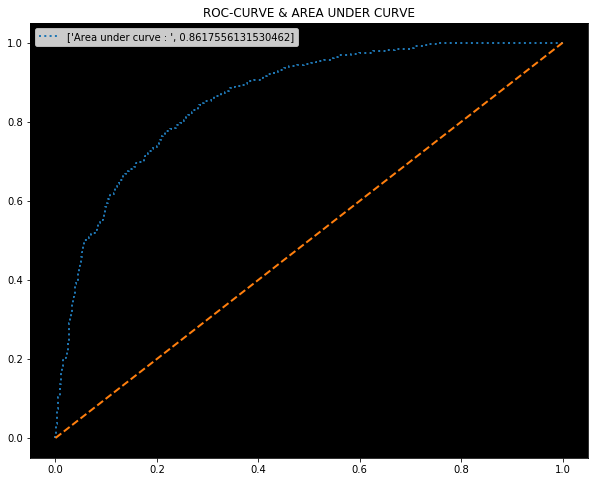

In [88]:
RFmodel = RandomForestClassifier(bootstrap=True,max_features='auto',min_samples_leaf=4,max_depth=70,
 min_samples_split=10,n_estimators=400, random_state = 42)

y_pred,y_prob,model_obj=model(RFmodel,x_train_smote,y_train_smote,x_test,y_test,x_train_smote.columns)

In [89]:
@scoring_func
def score(model, request):
    payload = request.json["payload"]
    data = pd.DataFrame(eval(payload))
    #data_list = payload
    #data_array = numpy.asarray(data_list)
    prediction = pd.Series(model.predict(data))
    #prediction_proba = model.predict_proba(data_array)
    return prediction.tolist()

import requests
req = requests.Request()
#req.json = {"payload":train_X.head(1).to_numpy()}
req.json = {"payload":x_train_smote.head(1).to_json()}

sch = generate_schema(score,(model_obj, req),x_train_smote)
print(sch)

{'input': {'type': 'pd.core.frame.DataFrame', 'items': {'type': 'object', 'properties': {'gender': {'type': 'number', 'format': 'double'}, 'seniorcitizen': {'type': 'number', 'format': 'double'}, 'partner': {'type': 'number', 'format': 'double'}, 'dependents': {'type': 'number', 'format': 'double'}, 'tenure': {'type': 'number', 'format': 'double'}, 'phoneservice': {'type': 'number', 'format': 'double'}, 'multiplelines': {'type': 'number', 'format': 'double'}, 'internetservice': {'type': 'number', 'format': 'double'}, 'onlinesecurity': {'type': 'number', 'format': 'double'}, 'onlinebackup': {'type': 'number', 'format': 'double'}, 'deviceprotection': {'type': 'number', 'format': 'double'}, 'techsupport': {'type': 'number', 'format': 'double'}, 'streamingtv': {'type': 'number', 'format': 'double'}, 'streamingmovies': {'type': 'number', 'format': 'double'}, 'paperlessbilling': {'type': 'number', 'format': 'double'}, 'monthlycharges': {'type': 'number', 'format': 'double'}, 'contract_One ye

In [ ]:
register_model(model_obj, 
               score, 
               name="telecom_churn_prediction", 
               description="Predicting the churn related to telecom industry",
               flavour=MLModelFlavours.sklearn,
               model_type="classification",
               schema=sch,
               y_true=y_test,
               y_pred=y_pred, 
               prob=y_prob, 
               features=x_train_smote.columns,
               labels=[0,1], 
               init_script="" ,
               input_type="json", 
               explain_ai=True, 
               x_train=x_train_smote, 
               x_test=test_X, 
               y_train=train_Y['TARGET'].tolist(),
               y_test=test_Y['TARGET'].tolist(),
               feature_names=train_X.columns.tolist(),
               original_features=train_X.columns.tolist(),
               feature_ids=train_X.columns,
               target_names=['Low Risk','High Risk'])
#kyd=True, kyd_score = True)
print("Registering model")